Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - loss: 0.0944 - val_loss: 0.0364
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0330 - val_loss: 0.0260
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0251 - val_loss: 0.0216
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0214 - val_loss: 0.0189
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0188 - val_loss: 0.0170
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0171 - val_loss: 0.0159
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 0.0160 - val_loss: 0.0149
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0149 - val_loss: 0.0140
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0143 - val_loss: 0.0134
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0135 - val_loss: 0.0127
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0129 - val_loss: 0.0124
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 

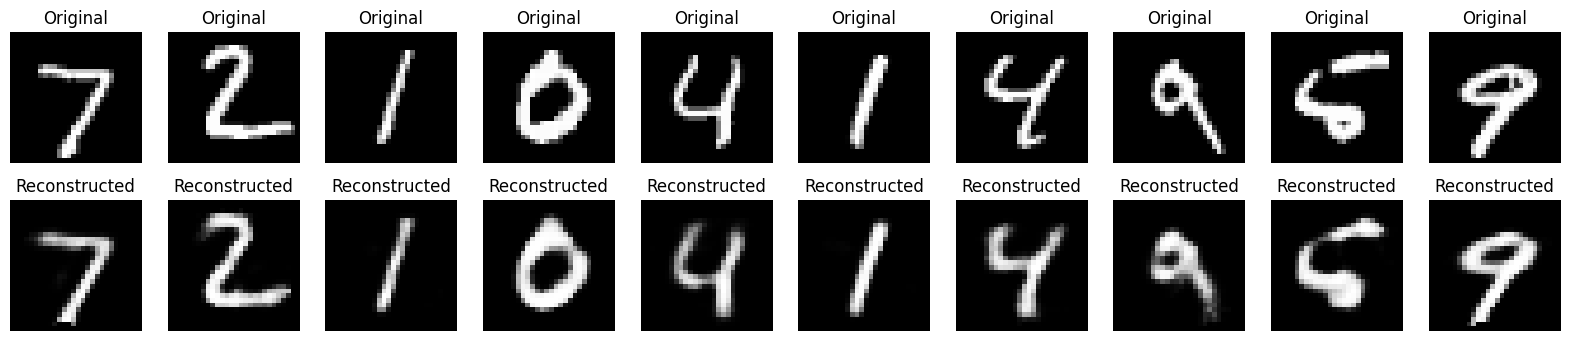

Compressed latent vector shape: (10000, 32)
Example compressed vector:
 [ 7.119854   0.        14.489704   9.747669  13.845946  14.661389
  9.244149  21.207605  14.896688  13.277619  10.04301    2.1117866
  0.         9.341264   0.        10.446962   0.        11.933197
 13.231171   8.888361   4.5930624  8.573586  17.26017    2.9805346
  5.62019    4.9485526  0.        17.734287  11.938669  14.391945
  8.575445  11.11905  ]


In [2]:
# -----------------------------------
# Autoencoder for Image Reconstruction (MNIST)
# -----------------------------------

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.optimizers import Adam

# -----------------------
# 1. Load MNIST dataset
# -----------------------
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize images to 0–1 range
x_train = x_train.astype("float32") / 255.
x_test = x_test.astype("float32") / 255.

# Flatten images (28*28 = 784)
x_train = x_train.reshape((len(x_train), 784))
x_test = x_test.reshape((len(x_test), 784))

# -----------------------
# 2. Autoencoder Architecture
# -----------------------

# Size of the latent (compressed) representation
latent_dim = 32  # compress 784 → 32 dimensions

# Encoder
input_img = Input(shape=(784,))
encoded = Dense(128, activation="relu")(input_img)
encoded = Dense(64, activation="relu")(encoded)
latent = Dense(latent_dim, activation="relu")(encoded)

# Decoder
decoded = Dense(64, activation="relu")(latent)
decoded = Dense(128, activation="relu")(decoded)
decoded = Dense(784, activation="sigmoid")(decoded)

# Complete Autoencoder Model
autoencoder = Model(input_img, decoded)

# Encoder Model (for compression)
encoder = Model(input_img, latent)

# Decoder Model (for reconstruction)
latent_inputs = Input(shape=(latent_dim,))
# Correctly chain the decoder layers from the autoencoder
x = autoencoder.layers[4](latent_inputs) # This corresponds to the first Dense(64) decoder layer
x = autoencoder.layers[5](x)             # This corresponds to the Dense(128) decoder layer
decoded_outputs = autoencoder.layers[6](x) # This corresponds to the Dense(784) output layer
decoder_model = Model(latent_inputs, decoded_outputs)

# -----------------------
# 3. Compile the Model
# -----------------------
autoencoder.compile(optimizer=Adam(), loss="mse")

# -----------------------
# 4. Train the Autoencoder
# -----------------------
history = autoencoder.fit(
    x_train, x_train,
    epochs=20,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test)
)

# -----------------------
# 5. Encode & Reconstruct Images
# -----------------------
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

# -----------------------
# 6. Visualization
# -----------------------

n = 10  # number of images to display
plt.figure(figsize=(20, 4))

for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    plt.title("Original")
    plt.axis("off")

    # Reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
    plt.title("Reconstructed")
    plt.axis("off")

plt.show()

# -----------------------
# 7. Show compressed (latent) features
# -----------------------
print("Compressed latent vector shape:", encoded_imgs.shape)
print("Example compressed vector:\n", encoded_imgs[0])
